# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=imperial" +"&q="

lat = []
lon = []
temp = []
places = []    
cloudiness = []  
country = []   
date = []     
humidity = []     
windspeed =[]
Count = 0

for city in cities:
    Count = Count+1
    print(city+ ": "+str( Count))

    city_url = query_url + city
    
    try:
        response = requests.get(city_url).json()
        Temperature = response["main"]["temp_max"]
        print(Temperature)
        #print(response["coord"])
        places.append(city)
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])  
        country.append(response["sys"]["country"])
        date.append(response["dt"])   
        humidity.append(response["main"]["humidity"])    
        windspeed.append(response["wind"]["speed"])
    except: 
        print("Missing City "+city)    
    
    



             
    
    
    
    
    
    
    
    
    
    



port alfred: 1
66.81
illoqqortoormiut: 2
Missing City illoqqortoormiut
cape town: 3
66
shakhtinsk: 4
24.8
marcona: 5
Missing City marcona
tazovskiy: 6
20.41
manggar: 7
80.76
barrow: 8
-14.8
jalu: 9
65.14
georgetown: 10
84
tasiilaq: 11
26.6
kodiak: 12
26.6
coquimbo: 13
68
araouane: 14
96.04
manokwari: 15
80.1
puerto armuelles: 16
79
esperance: 17
60.8
busselton: 18
69.01
katsuura: 19
50
puerto ayora: 20
86
klaksvik: 21
44.6
san quintin: 22
61.72
vaini: 23
64.4
taolanaro: 24
Missing City taolanaro
carnarvon: 25
77
port-gentil: 26
84.2
ribeira grande: 27
64.4
meiktila: 28
78.87
burgeo: 29
35.46
narsaq: 30
42.8
trairi: 31
84.88
whitehorse: 32
24.01
yellowknife: 33
12.99
mahebourg: 34
78.8
chara: 35
28.74
mahon: 36
62.6
berlevag: 37
27.75
santa isabel do rio negro: 38
83.79
hellvik: 39
44.01
ushuaia: 40
46.4
tondano: 41
75.2
disna: 42
39.94
mataura: 43
42.01
necochea: 44
73
sorland: 45
34.18
zachary: 46
72
cabedelo: 47
87.8
los llanos de aridane: 48
71.6
abonnema: 49
83.34
punta arenas: 50


84.33
tucupita: 397
92.73
grindavik: 398
39.2
karkaralinsk: 399
Missing City karkaralinsk
akim swedru: 400
79.97
samusu: 401
Missing City samusu
sao filipe: 402
76.95
kampong chhnang: 403
80.28
camacha: 404
68
jizan: 405
87.8
bathsheba: 406
86
mubende: 407
65.25
kresttsy: 408
35.91
longyearbyen: 409
3.2
panacan: 410
79.88
garoua boulai: 411
71.58
red bluff: 412
64
loukhi: 413
22.59
nalut: 414
73
alugan: 415
80.02
nantucket: 416
50
lovozero: 417
19.33
gat: 418
60.8
zemio: 419
74.93
olafsvik: 420
36.12
methoni: 421
64
yuancheng: 422
40.66
sao raimundo das mangabeiras: 423
89.19
palana: 424
4.87
lithakia: 425
61
capao da canoa: 426
69.75
porto nacional: 427
82.4
tikamgarh: 428
82.27
tabiauea: 429
Missing City tabiauea
labutta: 430
Missing City labutta
heyang: 431
64.24
mahina: 432
84.2
leshukonskoye: 433
20.3
anchorage: 434
27
fortuna foothills: 435
66.99
shaowu: 436
63.81
sibolga: 437
77.86
urengoy: 438
34.16
marabba: 439
93.6
khandyga: 440
31.41
havoysund: 441
26.6
west lafayette: 442
4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df = pd.DataFrame({"City": places,
                         "Lat": lat,
                         "Lon": lon,
                         "Temp Max": temp,
                        "Cloudiness": cloudiness,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "WindSpeed": windspeed
                       })
                       
                       
                       

city_df.to_csv(output_data_file)

print(city_df.head())


latitude = city_df["Lat"]
longitude = city_df["Lon"]
tempmax = city_df["Temp Max"]
cloudiness = city_df["Cloudiness"]
country = city_df["Country"]
date = city_df["Date"]
humidity = city_df["Humidity"]
windspeed = city_df["WindSpeed"]








          City    Lat     Lon  Temp Max  Cloudiness Country        Date  \
0  port alfred -33.59   26.89     66.81          95      ZA  1586539335   
1    cape town -33.93   18.42     68.00           3      ZA  1586539202   
2   shakhtinsk  49.71   72.59     32.00          52      KZ  1586539335   
3    tazovskiy  67.47   78.70     20.41          96      RU  1586539336   
4      manggar  -2.88  108.27     80.76         100      ID  1586539336   

   Humidity  WindSpeed  
0        81       2.44  
1        82       4.70  
2        68       6.71  
3        93       9.91  
4        81       4.23  


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

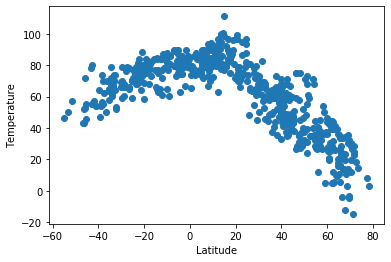

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(latitude,tempmax)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig("LatvsTemp.png")


#### Latitude vs. Humidity Plot

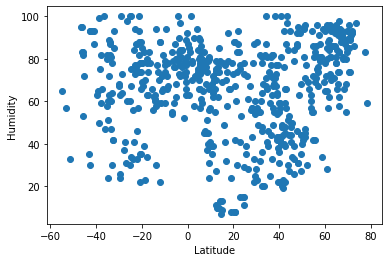

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(latitude,humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("LatvsHumid.png")

#### Latitude vs. Cloudiness Plot

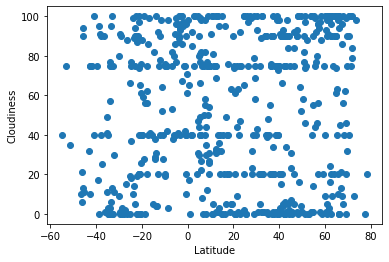

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(latitude,cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("LatvsCloud.png")

#### Latitude vs. Wind Speed Plot

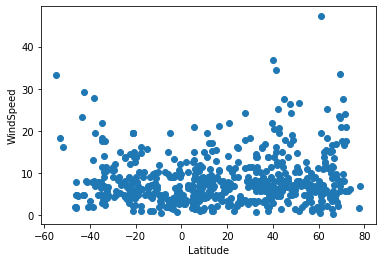

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(latitude,windspeed)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.show()
plt.savefig("LatvsWind.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
#city_df positive Lat
#lat + = Northern

northern_df = city_df.loc[(city_df["Lat"]>=0.0)]

southern_df = city_df.loc[(city_df["Lat"]<0)]

print(northern_df.head())

         City    Lat     Lon  Temp Max  Cloudiness Country        Date  \
2  shakhtinsk  49.71   72.59     32.00          52      KZ  1586539335   
3   tazovskiy  67.47   78.70     20.41          96      RU  1586539336   
5      barrow  71.29 -156.79    -14.80          75      US  1586539336   
6        jalu  29.03   21.55     65.14           0      LY  1586539148   
7  georgetown   5.41  100.34     84.20          40      MY  1586539199   

   Humidity  WindSpeed  
2        68       6.71  
3        93       9.91  
5        91       5.82  
6        33       6.78  
7        89       2.75  


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7818335182508678


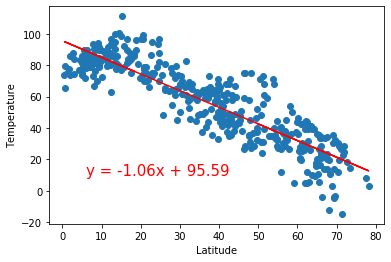

In [21]:
#predicting temperature based on latitude
x_values = northern_df['Lat']
y_values = northern_df['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5265406816081142


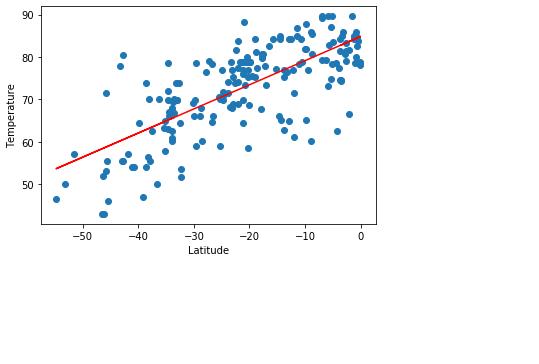

In [26]:
#predicting temperature based on latitude
x_values = southern_df['Lat']
y_values = southern_df['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07627104813682545


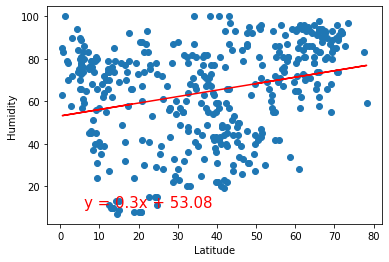

In [22]:
#predicting humidity based on latitude
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017952475401170023


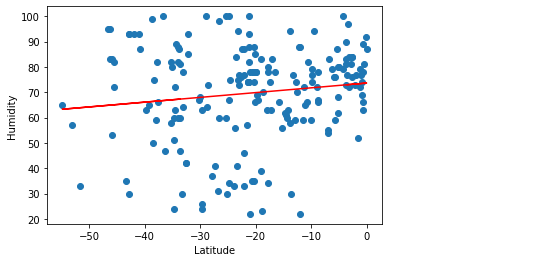

In [27]:
#predicting humidity based on latitude
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00671565353568457


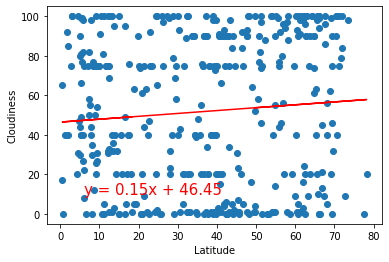

In [24]:
#predicting cloudiness based on latitude
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0810920763094783


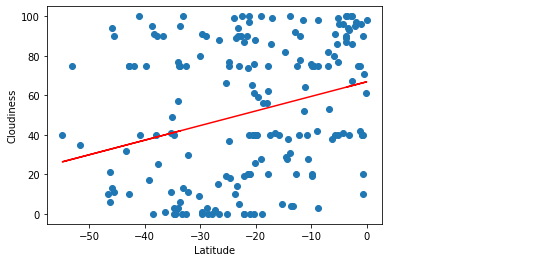

In [28]:
#predicting cloudiness based on latitude
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03312103021581562


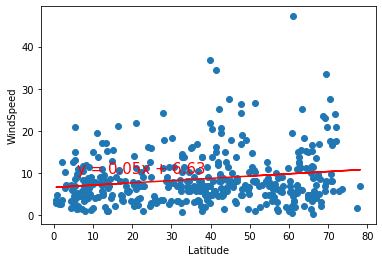

In [25]:
#predicting WindSpeed based on latitude
x_values = northern_df['Lat']
y_values = northern_df['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07332183778902276


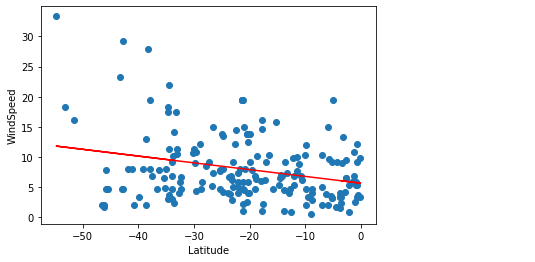

In [29]:
#predicting WindSpeed based on latitude
x_values = southern_df['Lat']
y_values = southern_df['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()